In [1]:
import pandas as pd
import numpy as np
import string
import re
import nltk
import sklearn

In [10]:
df = pd.read_csv(r'C:\Users\ANURAG DHAWAN\Desktop\PROJECT\Datasets\amazon_reviews.csv')
df.head()

,Unnamed: 0,Customer Name,Title,Rating,Review
0,0,vasu a.,Beast in OnePlus.,5.0 out of 5 stars,Brilliant..I have uploaded some pics of selfie as well as Portrait shot of near by shot.What i...
1,1,Amazon Customer,OnePlus nord,4.0 out of 5 stars,I used several phone except like this type of phone but this phone is very silky smoothy.90hz ...
2,2,ATMANAND SHARMA,Khoda pahad nikli chuihya,2.0 out of 5 stars,Average phone from one plus but surprisingly very bad battery life though good battery on pape...
3,3,Amazon Customer,One plus Nord issues,1.0 out of 5 stars,Display has green tint issue..display looks like a very cheap quality phone. Want to return th...
4,4,ARYA,'More than midrange but less than premium '. This phone has heating issues...😥,3.0 out of 5 stars,OnePlus Nord is a very competitive smartphone in this segment.Pros.Device is pretty impressive...


In [11]:
df = df.drop(['Unnamed: 0','Customer Name','Title'],axis=1)
pd.set_option('display.max_colwidth',100)

nltk.download('stopwords')
df.head()

[nltk_data] Downloading package stopwords to C:\Users\ANURAG
[nltk_data]     DHAWAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Rating,Review
0,5.0 out of 5 stars,Brilliant..I have uploaded some pics of selfie as well as Portrait shot of near by shot.What i...
1,4.0 out of 5 stars,I used several phone except like this type of phone but this phone is very silky smoothy.90hz ...
2,2.0 out of 5 stars,Average phone from one plus but surprisingly very bad battery life though good battery on pape...
3,1.0 out of 5 stars,Display has green tint issue..display looks like a very cheap quality phone. Want to return th...
4,3.0 out of 5 stars,OnePlus Nord is a very competitive smartphone in this segment.Pros.Device is pretty impressive...


In [14]:
def data_clean(text):
    translator= str.maketrans(string.punctuation, ' '*len(string.punctuation))
    text = text.translate(translator)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    tokens = re.split("\W+",text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = [word for word in tokens if word not in stopwords]
    return text

In [15]:
df['clean_review']= df['Review'].apply(lambda x: data_clean(x.lower()))
df.head()

,Rating,Review,clean_review
0,5.0 out of 5 stars,Brilliant..I have uploaded some pics of selfie as well as Portrait shot of near by shot.What i...,"[, brilliant, uploaded, pics, selfie, well, portrait, shot, near, shot, loved, phone, good, sens..."
1,4.0 out of 5 stars,I used several phone except like this type of phone but this phone is very silky smoothy.90hz ...,"[, used, several, phone, except, like, type, phone, phone, silky, smoothy, 90hz, refresh, rate, ..."
2,2.0 out of 5 stars,Average phone from one plus but surprisingly very bad battery life though good battery on pape...,"[, average, phone, one, plus, surprisingly, bad, battery, life, though, good, battery, paper, di..."
3,1.0 out of 5 stars,Display has green tint issue..display looks like a very cheap quality phone. Want to return th...,"[, display, green, tint, issue, display, looks, like, cheap, quality, phone, want, return, phone..."
4,3.0 out of 5 stars,OnePlus Nord is a very competitive smartphone in this segment.Pros.Device is pretty impressive...,"[, oneplus, nord, competitive, smartphone, segment, pros, device, pretty, impressive, looks, pre..."


In [18]:
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
def lemmatization(tokens):
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

df['lemmatized'] = df['clean_review'].apply(lambda x: lemmatization(x))
df.head()

,Rating,Review,clean_review,lemmatized
0,5.0 out of 5 stars,Brilliant..I have uploaded some pics of selfie as well as Portrait shot of near by shot.What i...,"[, brilliant, uploaded, pics, selfie, well, portrait, shot, near, shot, loved, phone, good, sens...","[, brilliant, uploaded, pic, selfie, well, portrait, shot, near, shot, loved, phone, good, senso..."
1,4.0 out of 5 stars,I used several phone except like this type of phone but this phone is very silky smoothy.90hz ...,"[, used, several, phone, except, like, type, phone, phone, silky, smoothy, 90hz, refresh, rate, ...","[, used, several, phone, except, like, type, phone, phone, silky, smoothy, 90hz, refresh, rate, ..."
2,2.0 out of 5 stars,Average phone from one plus but surprisingly very bad battery life though good battery on pape...,"[, average, phone, one, plus, surprisingly, bad, battery, life, though, good, battery, paper, di...","[, average, phone, one, plus, surprisingly, bad, battery, life, though, good, battery, paper, di..."
3,1.0 out of 5 stars,Display has green tint issue..display looks like a very cheap quality phone. Want to return th...,"[, display, green, tint, issue, display, looks, like, cheap, quality, phone, want, return, phone...","[, display, green, tint, issue, display, look, like, cheap, quality, phone, want, return, phone,..."
4,3.0 out of 5 stars,OnePlus Nord is a very competitive smartphone in this segment.Pros.Device is pretty impressive...,"[, oneplus, nord, competitive, smartphone, segment, pros, device, pretty, impressive, looks, pre...","[, oneplus, nord, competitive, smartphone, segment, pro, device, pretty, impressive, look, premi..."


In [20]:
def feedback(text):
    if(int(text[0])>3):
        return 3
    if(int(text[0])<3):
        return 1
    else:
        return 2
df['feedback'] = df['Rating'].apply(lambda x : feedback(x))    
df.head()

,Rating,Review,clean_review,lemmatized,feedback
0,5.0 out of 5 stars,Brilliant..I have uploaded some pics of selfie as well as Portrait shot of near by shot.What i...,"[, brilliant, uploaded, pics, selfie, well, portrait, shot, near, shot, loved, phone, good, sens...","[, brilliant, uploaded, pic, selfie, well, portrait, shot, near, shot, loved, phone, good, senso...",3
1,4.0 out of 5 stars,I used several phone except like this type of phone but this phone is very silky smoothy.90hz ...,"[, used, several, phone, except, like, type, phone, phone, silky, smoothy, 90hz, refresh, rate, ...","[, used, several, phone, except, like, type, phone, phone, silky, smoothy, 90hz, refresh, rate, ...",3
2,2.0 out of 5 stars,Average phone from one plus but surprisingly very bad battery life though good battery on pape...,"[, average, phone, one, plus, surprisingly, bad, battery, life, though, good, battery, paper, di...","[, average, phone, one, plus, surprisingly, bad, battery, life, though, good, battery, paper, di...",1
3,1.0 out of 5 stars,Display has green tint issue..display looks like a very cheap quality phone. Want to return th...,"[, display, green, tint, issue, display, looks, like, cheap, quality, phone, want, return, phone...","[, display, green, tint, issue, display, look, like, cheap, quality, phone, want, return, phone,...",1
4,3.0 out of 5 stars,OnePlus Nord is a very competitive smartphone in this segment.Pros.Device is pretty impressive...,"[, oneplus, nord, competitive, smartphone, segment, pros, device, pretty, impressive, looks, pre...","[, oneplus, nord, competitive, smartphone, segment, pro, device, pretty, impressive, look, premi...",2


3-->positive ; 2-->neutral ; 1-->negative

In [21]:
x = df.lemmatized
y=df.feedback
print(x.shape)
print(y.shape)

(4650,)
(4650,)


In [24]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state= 1)
X_train =X_train.apply(lambda x: ' '.join(x))
X_test = X_test.apply(lambda x: ' '.join(x))

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect =TfidfVectorizer(analyzer = "word")
vect.fit(X_train)
x_train_vect =vect.transform(X_train)
x_test_vect = vect.transform(X_test)
print(x_train_vect.shape)
print(x_test_vect.shape)

(4185, 7794)
(465, 7794)


In [35]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state =42)
sgd.fit(x_train_vect,y_train)
y_predict = sgd.predict(x_test_vect)

In [36]:
from sklearn.model_selection import cross_val_score  
cross_val_score(estimator = sgd, X = x_train_vect, y = y_train, cv = 3,scoring="accuracy") 

array([0.76845878, 0.76200717, 0.77419355])

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier()

classifier2.fit(x_train_vect,y_train)
cross_val_score(estimator = classifier2, X = x_train_vect, y = y_train, cv = 3,scoring="accuracy") 

array([0.68243728, 0.69390681, 0.67885305])

In [45]:
from sklearn.metrics import confusion_matrix
y_pred2 = classifier2.predict(x_test_vect)
cm = confusion_matrix(y_test,y_pred2)
cm

array([[ 46,  13,  30],
       [ 19,   8,  32],
       [ 35,  18, 264]], dtype=int64)

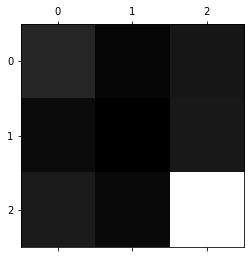

In [46]:
import matplotlib.pyplot as plt 
plt.matshow(cm,cmap = plt.cm.gray)
plt.show()

In [50]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_train_vect, y_train) 
svm_predictions = svm_model_linear.predict(x_test_vect) 
accuracy = svm_model_linear.score(x_test_vect, y_test)
accuracy

0.7827956989247312

In [53]:
cm = confusion_matrix(y_test, svm_predictions) 
cm

array([[ 62,   5,  22],
       [ 22,   4,  33],
       [ 15,   4, 298]], dtype=int64)

In [55]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train_vect, y_train) 
knn_predictions = knn.predict(x_test_vect)  
cm = confusion_matrix(y_test, knn_predictions) 
cm

array([[ 40,   3,  46],
       [ 11,   3,  45],
       [ 12,   2, 303]], dtype=int64)